# Project: Medical Appointment No Show

This project aims to investigate a medical appointment dataset from Brasil public hospitals. The objective is to find out how different factors 
have an impact on no shows.

Here are some details of the columns:

* PatientId = ID of the patient
* AppointmentID = ID of the appointment
* Gender = Gender of patient
* ScheduledDay = The day which appintment scheduled
* AppointmentDay = The day which appintment planned to occur
* Age = Age of the patient
* Neighbourhood = The place where hospital located
* Scholarship = If the patient has scholarship or not
* Hipertension = If the patient has Hipertension or not
* Diabetes = If the patient has Diabetes or not
* Alcoholism = If the patient has Alcoholism or not
* Handcap = If the patient has Handcap or not
* SMS_received = If the patient received an SMS for the appointment
* No.show = no show information. “Yes” means patient did not come to the appointment, “No” means patient came to appointment.

## Gather data and libraries 

In [6]:
#Loading libraries
import pandas as pd
import numpy as np
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; 
warnings.filterwarnings(action='ignore')

In [7]:
#Loading dataset
data=pd.read_csv('no_show.csv')

In [8]:
#Check head and tail
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [10]:
data.shape

(110527, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [14]:
sum(data.duplicated())

0

## Access

Following insights could be drawn from the above analysis:

* Dataset has 110527 rows and 14 columns
* There is no missing value in the data.
* 'Hipertension' and 'Handcap' is spelled wrong.
* Some of the variables have wrong data type like Scholarship, Hipertension, Diabetes should not be integers.
* Column Age has a minimum value -1 which could not be possible.
* Some columns like PatientId, AppointmentID are not useful.
* Some new features could be build from the data available. 

## Clean

#### 1. Define 
To correct spelling of 'Hipertension' and 'Handcap' 

#### Code

In [15]:
data.rename(columns={'Hipertension':'Hypertension',
                    'Handcap':'Handicap'},inplace=True)

#### Test

In [16]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 2. Define
To correct data types of certain variables

#### Code

In [17]:
data['PatientId']=data['PatientId'].astype(str)
data['AppointmentID']=data['AppointmentID'].astype(str)
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])
data['Scholarship']=data['Scholarship'].astype(str)
data['Hypertension']=data['Hypertension'].astype(str)
data['Diabetes']=data['Diabetes'].astype(str)
data['Alcoholism']=data['Alcoholism'].astype(str)
data['Handicap']=data['Handicap'].astype(str)
data['SMS_received']=data['SMS_received'].astype(str)

#### Test

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  object             
 8   Hypertension    110527 non-null  object             
 9   Diabetes        110527 non-null  object             
 10  Alcoholism      110527 non-null  object             
 11  Handicap        110527 non-null  object             
 12  SMS_received    110527 non-null  object             
 13  No-show       

#### 3. Define

Building new features from the available data.

#### Code

In [19]:
#Separate day, month, year from Appointment day
data['month'] = data['AppointmentDay'].dt.month
data['year'] = data['AppointmentDay'].dt.year
data['day'] = data['AppointmentDay'].dt.day

#Naming day and month
data['day_name'] = data['AppointmentDay'].dt.day_name()
data['month_name'] = data['AppointmentDay'].dt.month_name()

#### Test

In [20]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,month,year,day,day_name,month_name
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,2016,29,Friday,April
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,2016,29,Friday,April
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,2016,29,Friday,April
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,2016,29,Friday,April
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,2016,29,Friday,April


#### 4. Define

To drop irrelevant columns 

#### Code

In [21]:
data=data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood','month','day'],1)

#### Test


In [22]:
data.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,year,day_name,month_name
0,F,62,0,1,0,0,0,0,No,2016,Friday,April
1,M,56,0,0,0,0,0,0,No,2016,Friday,April
2,F,62,0,0,0,0,0,0,No,2016,Friday,April
3,F,8,0,0,0,0,0,0,No,2016,Friday,April
4,F,56,0,1,1,0,0,0,No,2016,Friday,April


#### 5. Define

To remove -1 from the age column

#### Code

In [23]:
data=data[data.Age >= 0]

#### Test

In [24]:
data.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

## Data Visualization 

### Univariate analysis

#### 1) Age

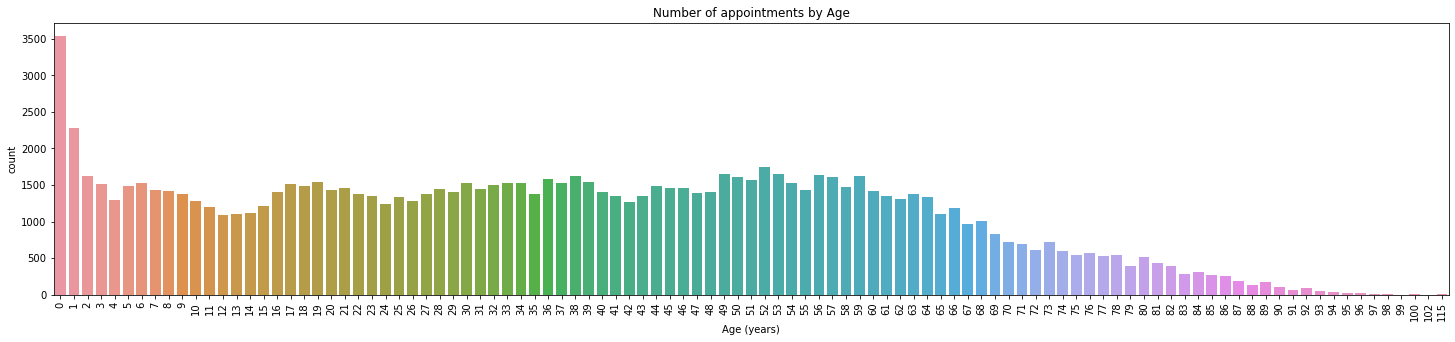

In [25]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=data.Age)
ax.set_title("Number of appointments by Age")
ax.set_xlabel("Age (years)")
plt.show()

It looks like most of the appointments are made for the infants

#### 2) Gender

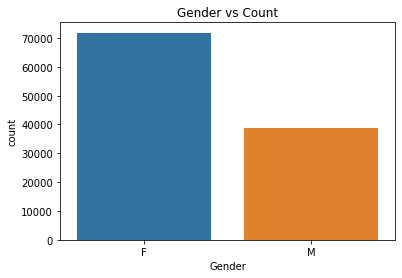

In [26]:
sns.countplot(data=data,x='Gender').set_title("Gender vs Count");

It looks like females are more in the dataset as compared to the males

#### 3) Day name

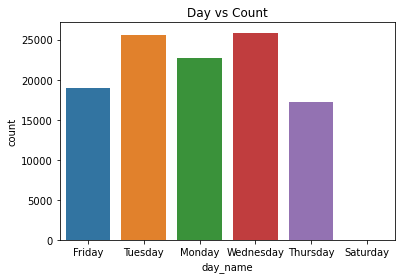

In [27]:
sns.countplot(data=data,x='day_name').set_title("Day vs Count");

Most of the appointments are made on Tuesday and Wednesday. Also, there isn't any appointment on Saturday.

#### 4) Month name

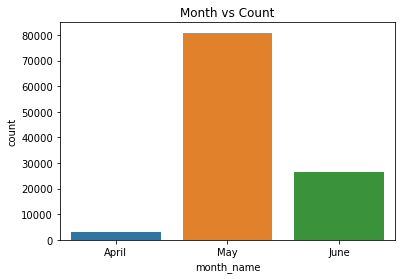

In [28]:
sns.countplot(data=data,x='month_name').set_title("Month vs Count");

More than half of the appointments are made in May only.

#### 5) No Show

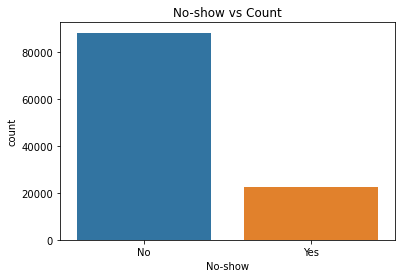

In [29]:
sns.countplot(data=data,x='No-show').set_title("No-show vs Count");

From the above graph, it is clear that around 20000 patients did not show up for their appointment.

### Bivariate analysis

#### 1) No-show vs Gender

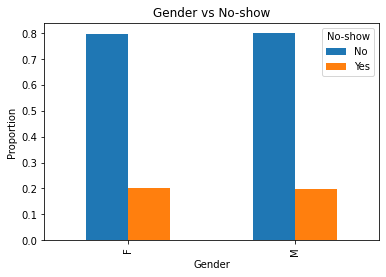

In [30]:
#Proportion of total males and females and their no-shows
Noshow_Gender_percent=pd.crosstab(index=data["Gender"], 
            columns=data["No-show"], normalize = 'index')

Noshow_Gender_percent.plot(kind='bar')
plt.title('Gender vs No-show')
plt.xlabel('Gender')
plt.ylabel('Proportion');

There is no difference in the no show rates of males and females.

#### 2) No-show vs Age

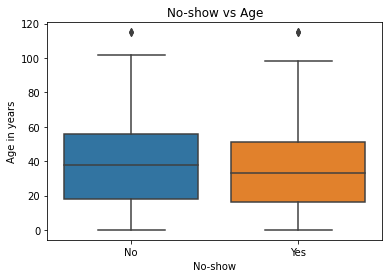

In [31]:
ax= sns.boxplot(data=data, x="No-show", y="Age" )
ax.set_title("No-show vs Age")
ax.set_ylabel("Age in years")
plt.show();

Looks like younger people showed less compared to the older ones.

#### 3) No-show vs 'Scholarship','Hypertension','Diabetes', 'Alcoholism', 'Handicap' and 'SMS_received'

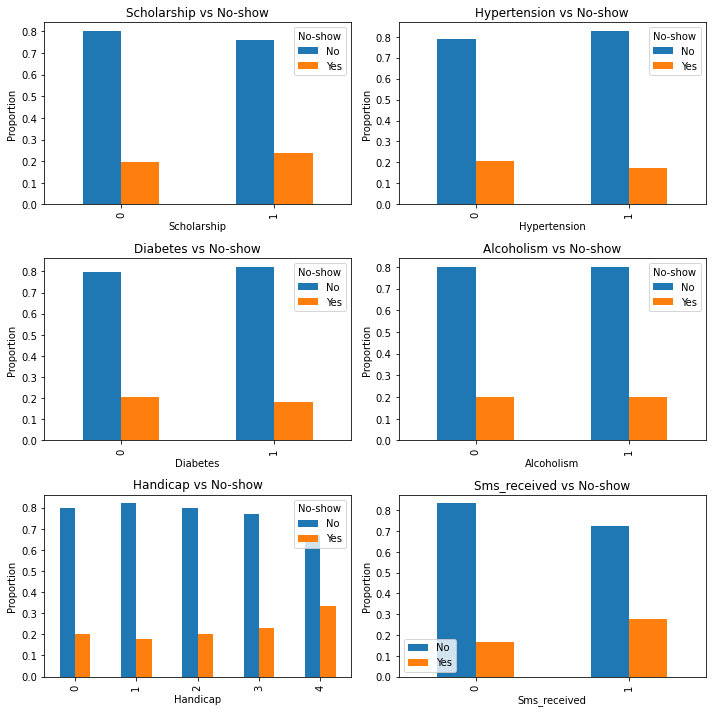

In [32]:
vars= ['Scholarship','Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

fig = plt.figure(figsize= (10,10))
for x, column in enumerate(vars):
    axes = fig.add_subplot(3,2, x+1)
    axes.set_title(column.capitalize() + ' vs No-show')
    pd.crosstab(index = data[column], columns = data['No-show'],normalize = 'index').plot(kind = 'bar', ax = axes)                                                                                                                                  
    axes.set_xlabel(column.capitalize())
    plt.ylabel('Proportion')
plt.tight_layout() 
plt.legend(loc = 3);

No-show rate is higher in patients with scholarship, without hypertension, and ones who received the sms.  

### Multivariate analysis

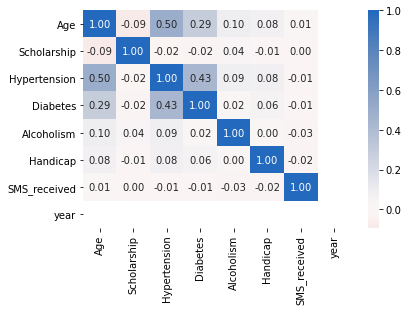

In [33]:
data['Scholarship']=data['Scholarship'].astype(int)
data['Hypertension']=data['Hypertension'].astype(int)
data['Diabetes']=data['Diabetes'].astype(int)
data['Alcoholism']=data['Alcoholism'].astype(int)
data['Handicap']=data['Handicap'].astype(int)
data['SMS_received']=data['SMS_received'].astype(int)

sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Age has positive correlation with all except scholarship.
Age and hypertension, Age and diabetes, hypertension and diabetes are strongly (positively) correlated.

### Conclusion

* Younger people have more no show rate compared to the older ones.
* There is no difference between the no-show rates of male and females.
* Patients with Scholarship and without Hypertension have higher frequency of not showing up.
* Diabetes and Alcoholism doesn't seem to have an effect on the no-show rate.
* Patients receiving SMSs have more liklihood of missing an appointment.
* Most of the appointments are made on Tuesday and Wednesday. Also, there isn't any appointment on Saturday.
* More than half of the appointments are made in May only.

### Limitations

No statistical analysis was done on this data.